<a href="https://colab.research.google.com/github/nghoanglong/Data-Science-Research/blob/master/handson-ml2/01_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# fetch và save file data vào google drive

FETCH_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
SAVE_FILE_PATH = "/content/drive/MyDrive/All Datasets/Housing-Prediction/housing_data.csv"

def fetch_data(FETCH_PATH=FETCH_PATH, PATH_SAVE_FILE=SAVE_FILE_PATH):
    df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
    df.to_csv(SAVE_FILE_PATH, index=False)

In [ ]:
fetch_data()

In [ ]:
# đọc dữ liệu file csv

housing_data = pd.read_csv(SAVE_FILE_PATH)
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# tóm tắt dữ liệu
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# đếm số giá trị của một attribute nào đó

housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(housing_data, test_size=0.3 ,random_state=17)
train_data

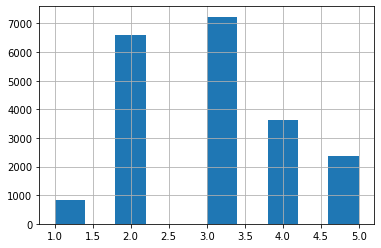

In [ ]:
# houssing income categorical
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
housing_data["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [ ]:
housing = strat_train_set.copy()

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

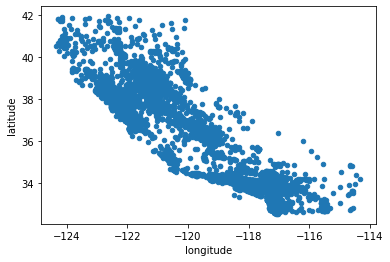

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")